## imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 700, 'display.max_columns', 99)

## Content

In [4]:
usage = pd.read_csv('processed_pai_snapshot_c6_d2019-04-15_usage.csv')

/Users/joshfriedlander/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
cs = pd.read_csv('processed_pai_snapshot_c6_d2019-04-15_cs.csv')

In [7]:
import re

In [195]:
import missingno as msno

Looking at usage

In [6]:
clean_usage = pd.read_csv('APPSFLYER_cleaned_usage_APPSFLYER(1).csv')

In [7]:
clean_target = pd.read_csv('APPSFLYER_cleaned_target_APPSFLYER.csv')

In [31]:
clean_target = clean_target.sort_values(by=['pai_account_id', 'date'])

In [8]:
clean_target.head()

,client_id,pai_account_id,recipe_execution_date,pai_is_deleted,account_birth_date,poc_end_date,profile,date,churn_date,churn_in_stage_paying,churn_in_stage_poc,reached_poc_stage,stage,churn_in_stage
0,6,0010O00001jRcV6,2019-03-26,0,2016-11-06,NaN,NaN,2019-02-09,NaN,0,0,0,,NaN
1,6,0010O00001jRcn5,2019-03-26,0,2016-11-06,NaN,NaN,2019-02-09,NaN,0,0,0,,NaN
2,6,0010O00001jRcxQ,2019-03-26,0,NaN,NaN,longtail,2019-02-09,NaN,0,0,0,,NaN
3,6,0010O00001jRd7a,2019-03-26,0,2016-11-06,NaN,NaN,2019-02-09,NaN,0,0,0,,NaN
4,6,0010O00001jRdDp,2019-03-26,0,NaN,NaN,longtail,2019-02-09,NaN,0,0,0,,NaN


In [13]:
clean_target.groupby('pai_account_id')['date', 'churn_date'].apply(lambda x: (x.date > x.churn_date).all())

pai_account_id
0010O00001jRcV6    False
0010O00001jRcn5    False
0010O00001jRcxQ    False
0010O00001jRd7a    False
0010O00001jRdDp    False
0010O00001jRdGD    False
0010O00001jRdQ5    False
0010O00001jRdQh    False
0010O00001jRdR1    False
0010O00001jRdRV    False
0010O00001jRdSM    False
0010O00001jRdSg    False
0010O00001jRdT0    False
0010O00001jRdc9    False
0010O00001jRddU    False
0010O00001jRdhr    False
0010O00001jRduR    False
0010O00001jRdyl    False
0010O00001jRe0B    False
0010O00001jRe0f    False
0010O00001jRe1l    False
0010O00001jRe21    False
0010O00001jReFp    False
0010O00001jRemp    False
0010O00001jRemz    False
0010O00001jRfKP    False
0010O00001jRfN2    False
0010O00001jRfeI    False
0010O00001jRflo    False
0010O00001jRfnV    False
0010O00001jRfnf    False
0010O00001jRfuI    False
0010O00001jRfvL    False
0010O00001jRfyS    False
0010O00001jRg2c    False
0010O00001jRg3Q    False
0010O00001jRg5F    False
0010O00001jRgA3    False
0010O00001jRgAw    False
0010O00001

In [15]:
ind = _

In [41]:
a = np.array([3,4,5])

In [43]:
b = {6,4,7,5}

In [48]:
b.difference(a)

{6, 7}

In [21]:
ind[ind].index.values

array(['0010O00001jRgDP', '0010O00001jSR30', '0010O00001kCq9j',
       '0010O00001kcB2o', '0010O00001kcW6i', '0010O00001kygMV',
       '0010O00001kz4Fr', '0010O00001kzwfA', '0010O00001l0U3M',
       '0010O00001lQuWC', '0010O00001lRBBh', '0010O00001lStdY',
       '0010O00001lTtHJ', '0010O00001lU5K4', '0010O00001lcbm4',
       '0010O00001mJAnm', '0010O00001mJBdn', '0010O00001mJjnr',
       '0010O00001mK6bi', '0010O00001mSOV0', '0010O00001mSins',
       '0010O00001mSlZD', '0010O00001mToNq', '0010O00001mTpFt',
       '0010O00001mUkrf', '0010O00001mUp2Y', '0010O00001mUq4O',
       '0010O00001mVTPK', '0010O00001nODmL', '0010O00001nOTcZ',
       '0010O00001nOuSi', '0010O00001nQQ4p', '0010O00001nQo6s',
       '0010O00001nQp0G', '0010O00001nRQdV', '0010O00001np8zk',
       '0010O00001npKeG', '0010O00001npn0c', '0010O00001nqF9o',
       '0010O00001nqyns', '0010O00001owuxE', '0010O00001oxK4z',
       '0010O00001oxOpO', '0010O00001oyvsH', '0010O00001pSwrf',
       '0010O00001pWEwd', '0010O00001pqu

In [34]:
clean_target.account_birth_date.reset_index(drop=True).first_valid_index()

0

In [35]:
clean_target.groupby('pai_account_id')['account_birth_date'].apply(lambda x: x.reset_index(drop=True).first_valid_index())

pai_account_id
0010O00001jRcV6    0.0
0010O00001jRcn5    0.0
0010O00001jRcxQ    NaN
0010O00001jRd7a    0.0
0010O00001jRdDp    NaN
0010O00001jRdGD    0.0
0010O00001jRdQ5    0.0
0010O00001jRdQh    0.0
0010O00001jRdR1    0.0
0010O00001jRdRV    0.0
0010O00001jRdSM    0.0
0010O00001jRdSg    0.0
0010O00001jRdT0    0.0
0010O00001jRdc9    0.0
0010O00001jRddU    0.0
0010O00001jRdhr    0.0
0010O00001jRduR    NaN
0010O00001jRdyl    NaN
0010O00001jRe0B    0.0
0010O00001jRe0f    0.0
0010O00001jRe1l    0.0
0010O00001jRe21    0.0
0010O00001jReFp    NaN
0010O00001jRemp    0.0
0010O00001jRemz    0.0
0010O00001jRfKP    0.0
0010O00001jRfN2    0.0
0010O00001jRfeI    0.0
0010O00001jRflo    NaN
0010O00001jRfnV    0.0
0010O00001jRfnf    0.0
0010O00001jRfuI    0.0
0010O00001jRfvL    0.0
0010O00001jRfyS    0.0
0010O00001jRg2c    0.0
0010O00001jRg3Q    0.0
0010O00001jRg5F    0.0
0010O00001jRgA3    0.0
0010O00001jRgAw    NaN
0010O00001jRgBk    0.0
0010O00001jRgDP    0.0
0010O00001jRgE8    NaN
0010O00001jRgXU    

In [36]:
indices = _

In [37]:
indices

pai_account_id
0010O00001jRcV6    0.0
0010O00001jRcn5    0.0
0010O00001jRcxQ    NaN
0010O00001jRd7a    0.0
0010O00001jRdDp    NaN
0010O00001jRdGD    0.0
0010O00001jRdQ5    0.0
0010O00001jRdQh    0.0
0010O00001jRdR1    0.0
0010O00001jRdRV    0.0
0010O00001jRdSM    0.0
0010O00001jRdSg    0.0
0010O00001jRdT0    0.0
0010O00001jRdc9    0.0
0010O00001jRddU    0.0
0010O00001jRdhr    0.0
0010O00001jRduR    NaN
0010O00001jRdyl    NaN
0010O00001jRe0B    0.0
0010O00001jRe0f    0.0
0010O00001jRe1l    0.0
0010O00001jRe21    0.0
0010O00001jReFp    NaN
0010O00001jRemp    0.0
0010O00001jRemz    0.0
0010O00001jRfKP    0.0
0010O00001jRfN2    0.0
0010O00001jRfeI    0.0
0010O00001jRflo    NaN
0010O00001jRfnV    0.0
0010O00001jRfnf    0.0
0010O00001jRfuI    0.0
0010O00001jRfvL    0.0
0010O00001jRfyS    0.0
0010O00001jRg2c    0.0
0010O00001jRg3Q    0.0
0010O00001jRg5F    0.0
0010O00001jRgA3    0.0
0010O00001jRgAw    NaN
0010O00001jRgBk    0.0
0010O00001jRgDP    0.0
0010O00001jRgE8    NaN
0010O00001jRgXU    

In [38]:
clean_target.query("pai_account_id=='0010O00001jRflo'").sort_values(by=['date', 'churn_date'])

,client_id,pai_account_id,recipe_execution_date,pai_is_deleted,account_birth_date,poc_end_date,profile,date,churn_date,churn_in_stage_paying,churn_in_stage_poc,reached_poc_stage,stage,churn_in_stage
28,6,0010O00001jRflo,2019-03-26,0,NaN,NaN,longtail,2019-02-09,NaN,0,0,0,,NaN
68084,6,0010O00001jRflo,2019-03-26,0,NaN,NaN,longtail,2019-02-10,NaN,0,0,0,,NaN
136168,6,0010O00001jRflo,2019-03-26,0,NaN,NaN,longtail,2019-02-14,NaN,0,0,0,paying,0.0
204592,6,0010O00001jRflo,2019-03-26,0,NaN,NaN,longtail,2019-02-15,NaN,0,0,0,paying,0.0
273090,6,0010O00001jRflo,2019-03-26,0,NaN,NaN,longtail,2019-02-16,NaN,0,0,0,paying,0.0
338838,6,0010O00001jRflo,2019-03-26,0,NaN,NaN,longtail,2019-02-17,NaN,0,0,0,paying,0.0
407425,6,0010O00001jRflo,2019-03-26,0,NaN,NaN,longtail,2019-02-18,NaN,0,0,0,paying,0.0
473197,6,0010O00001jRflo,2019-03-26,0,NaN,NaN,longtail,2019-02-19,NaN,0,0,0,paying,0.0
539480,6,0010O00001jRflo,2019-03-26,0,NaN,NaN,longtail,2019-02-22,NaN,0,0,0,paying,0.0
608522,6,0010O00001jRflo,2019-03-26,0,NaN,NaN,longtail,2019-02-23,NaN,0,0,0,paying,0.0


In [11]:
clean_target[~pd.isna(clean_target.churn_date)].sort_values(by=['churn_date'])

,client_id,pai_account_id,recipe_execution_date,pai_is_deleted,account_birth_date,poc_end_date,profile,date,churn_date,churn_in_stage_paying,churn_in_stage_poc,reached_poc_stage,stage,churn_in_stage
2072822,6,0012000001f4utF,2019-03-26,0,2016-08-02,NaN,longtail,2019-03-18,2016-12-12,1,0,0,paying,1.0
1090453,6,0012000001f4utF,2019-03-26,0,2016-08-02,NaN,longtail,2019-03-02,2016-12-12,1,0,0,paying,1.0
2002062,6,0012000001f4utF,2019-03-26,0,2016-08-02,NaN,longtail,2019-03-17,2016-12-12,1,0,0,paying,1.0
1509118,6,0012000001f4utF,2019-03-26,0,2016-08-02,NaN,longtail,2019-03-09,2016-12-12,1,0,0,paying,1.0
743842,6,0012000001f4utF,2019-03-26,0,2016-08-02,NaN,longtail,2019-02-24,2016-12-12,1,0,0,paying,1.0
1020949,6,0012000001f4utF,2019-03-26,0,2016-08-02,NaN,longtail,2019-03-01,2016-12-12,1,0,0,paying,1.0
2143671,6,0012000001f4utF,2019-03-26,0,2016-08-02,NaN,longtail,2019-03-19,2016-12-12,1,0,0,paying,1.0
404960,6,0012000001f4utF,2019-03-26,0,2016-08-02,NaN,longtail,2019-02-17,2016-12-12,1,0,0,paying,1.0
951484,6,0012000001f4utF,2019-03-26,0,2016-08-02,NaN,longtail,2019-02-27,2016-12-12,1,0,0,paying,1.0
2214606,6,0012000001f4utF,2019-03-26,0,2016-08-02,NaN,longtail,2019-03-20,2016-12-12,1,0,0,paying,1.0


In [133]:
proc_usage = pd.read_csv('processed_pai_snapshot_c6_d2019-03-26_usage.csv')

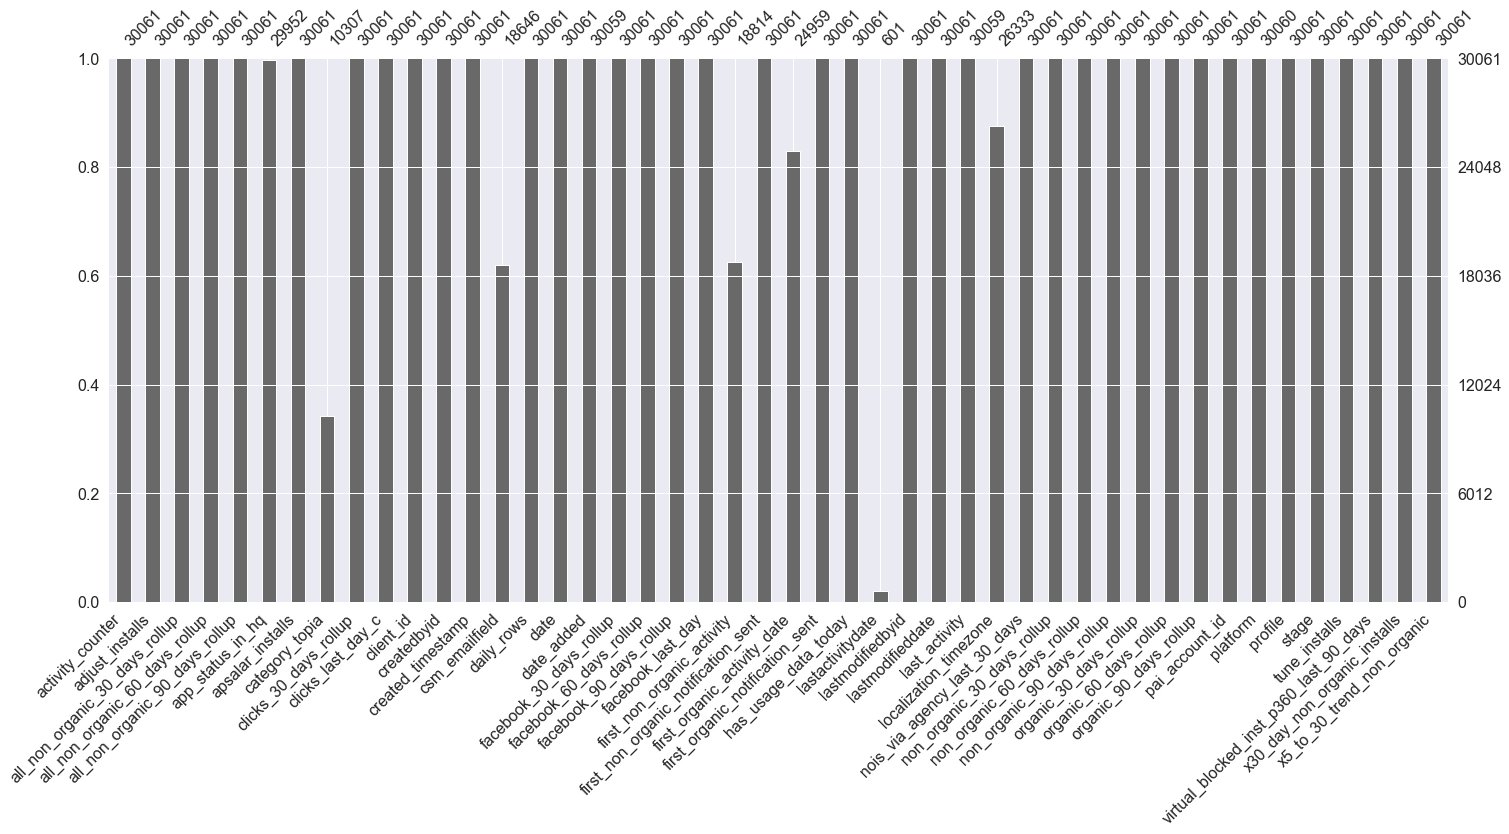

In [196]:
msno.bar(proc_usage)

In [72]:
date_cols = ['last_activity', 'lastactivitydate', 'lastmodifieddate', 'date_added', 'first_organic_activity_date',
            'first_non_organic_activity_date', 'created_date_timestamp', 'date']

In [74]:
for col in date_cols:
    clean_usage[col] = pd.to_datetime(clean_usage[col])

In [151]:
proc_usage.has_usage_data_today.max()#sort_values().reset_index(drop=True).plot(kind='kde');

575.0

In [223]:
a = pd.read_csv('preprocessed_c6_engagement_df.csv')

In [226]:
a.head()

,client_id,event_timestamp,event_id,account_id,recipe_execution_date,sdr_a,sdr_app,sdr_m,service_name,session_id,sdr_u,sdr_a_0,sdr_a_1
0,6,2019-01-10T08:58:50Z,d121add8-5cd6-4e68-b2c6-5ef5ad09673f,0010O00001kcQFj,2019-04-10T00:00:00Z,NaN,NaN,NaN,dashboard,NaN,e.dolgin@wowmaking.net,activity,scroll_to_bottom
1,6,2019-01-10T12:01:11Z,7c26338c-9bef-4039-8723-943bddfdba35,0010O00001t3IU1,2019-04-10T00:00:00Z,NaN,NaN,NaN,dashboard,1.547122e+12,ana@trendier.com.co,link-management,overview_page_view
2,6,2019-01-10T14:00:25Z,6f4e005f-da62-4c66-9631-b9c55872e431,0010O00001kcQFj,2019-04-10T00:00:00Z,NaN,NaN,NaN,dashboard,NaN,e.dolgin@wowmaking.net,activity,scroll_to_bottom
3,6,2019-01-13T19:50:01Z,e1e07004-774e-4943-97ab-5bfcb775af73,0010O00001kcQFj,2019-04-10T00:00:00Z,NaN,NaN,NaN,dashboard,NaN,e.dolgin@wowmaking.net,activity,scroll_to_bottom
4,6,2019-01-10T13:40:14Z,3ca4f4b9-7460-41d6-819c-48adcc95ac96,0010O00001pStDG,2019-04-10T00:00:00Z,NaN,NaN,NaN,api,NaN,hariom@eazydiner.com,pull,api_raw_lego


In [227]:
a.to_csv('preprocessed_c6_engagement_df.csv', index=False)

In [225]:
a = a.drop(columns=['event_properties'])

In [194]:
proc_usage = pd.read_csv('processed_pai_snapshot_c6_d2019-03-26_usage.csv')
proc_usage.head()

,activity_counter,adjust_installs,all_non_organic_30_days_rollup,all_non_organic_60_days_rollup,all_non_organic_90_days_rollup,app_status_in_hq,apsalar_installs,category_topia,clicks_30_days_rollup,clicks_last_day_c,client_id,createdbyid,created_timestamp,csm_emailfield,daily_rows,date,date_added,facebook_30_days_rollup,facebook_60_days_rollup,facebook_90_days_rollup,facebook_last_day,first_non_organic_activity,first_non_organic_notification_sent,first_organic_activity_date,first_organic_notification_sent,has_usage_data_today,lastactivitydate,lastmodifiedbyid,lastmodifieddate,last_activity,localization_timezone,nois_via_agency_last_30_days,non_organic_30_days_rollup,non_organic_60_days_rollup,non_organic_90_days_rollup,organic_30_days_rollup,organic_60_days_rollup,organic_90_days_rollup,pai_account_id,platform,profile,stage,tune_installs,virtual_blocked_inst_p360_last_90_days,x30_day_non_organic_installs,x5_to_30_trend_non_organic
0,1006.0,1.0,858110.0,1566867.0,2536642.0,Active,0.0,Health & Fitness,258.0,0.0,12,00520000003UHvWAAW,2017-07-29 01:17:47,liv.viola@appsflyer.com,12,2017-07-29,2017-07-28,678601.0,1198138.0,1836307.0,0.0,2017-08-03 00:00:00,False,2017-07-31 00:00:00,False,2.0,NaN,0050O0000084wVWQAY,2019-03-21 11:23:10,2019-03-19 00:00:00,Europe/Berlin,0.0,179509.0,368729.0,700335.0,697895.0,1459171.0,2159007.0,0010O00001jRg3Q,android,enterprise,paying,1.0,0.0,1536711.0,196.43
1,37.0,0.0,37883.0,82242.0,119865.0,Active,0.0,NaN,6158.0,0.0,6,00520000003UHvWAAW,2017-10-12 01:19:41,benno@appsflyer.com,6,2017-10-12,2017-10-11,4311.0,9789.0,15233.0,0.0,2018-01-11 00:00:00,False,2017-12-21 00:00:00,False,1.0,NaN,0050O000007JHoLQAW,2019-03-25 15:11:01,2019-03-04 00:00:00,Europe/Berlin,0.0,33572.0,72453.0,104632.0,16492.0,36254.0,55604.0,0010O00001jRmWy,android,smb,paying,0.0,0.0,42194.0,82.89
2,37.0,0.0,0.0,0.0,0.0,Pending,0.0,NaN,0.0,0.0,6,00520000003UHvWAAW,2017-10-27 01:38:19,NaN,5,2017-10-27,2017-10-26,0.0,0.0,0.0,0.0,NaN,False,2017-10-26 00:00:00,False,1.0,NaN,0050O0000084wVWQAY,2019-03-22 03:19:54,2019-03-04 00:00:00,Europe/Berlin,0.0,0.0,0.0,0.0,5.0,7.0,12.0,0010O00001jRmWy,android,smb,paying,0.0,0.0,0.0,0.00
3,74.0,0.0,0.0,0.0,0.0,Pending,0.0,NaN,0.0,0.0,12,00520000003UHvWAAW,2017-11-17 01:42:12,NaN,10,2017-11-17,2017-11-16,0.0,0.0,0.0,0.0,NaN,False,2017-11-16 00:00:00,False,2.0,NaN,0050O0000084wVWQAY,2019-03-22 03:20:48,2019-03-04 00:00:00,Europe/Berlin,0.0,0.0,0.0,0.0,7.0,17.0,18.0,0010O00001jRmWy,android,smb,paying,0.0,0.0,0.0,0.00
4,37.0,0.0,0.0,0.0,0.0,Pending,0.0,NaN,0.0,0.0,6,00520000003UHvWAAW,2017-11-22 01:10:14,NaN,5,2017-11-22,2017-11-21,0.0,0.0,0.0,0.0,NaN,False,2018-01-15 00:00:00,False,1.0,NaN,0050O0000084wVWQAY,2019-03-25 03:16:19,2019-03-04 00:00:00,Europe/Berlin,0.0,0.0,0.0,0.0,5.0,5.0,5.0,0010O00001jRmWy,ios,smb,paying,0.0,0.0,0.0,0.00


In [193]:
# read in data, aggregate, and replace with only 1 or 0
proc_usage = pd.read_csv('processed_pai_snapshot_c6_d2019-03-26_usage.csv')
proc_usage.date = pd.to_datetime(proc_usage.date)
proc_usage = proc_usage.set_index('date').sort_index().resample('D').sum()
proc_usage.loc[proc_usage.has_usage_data_today > 1, 'has_usage_data_today'] = 1.0

# add column counting days since last usage
a = ~proc_usage.has_usage_data_today.astype('bool')
b = a.cumsum()
proc_usage['days_since_last_usage'] = b - b.where(~a).ffill().fillna(1).astype(int)
proc_usage.head()

,activity_counter,adjust_installs,all_non_organic_30_days_rollup,all_non_organic_60_days_rollup,all_non_organic_90_days_rollup,apsalar_installs,clicks_30_days_rollup,clicks_last_day_c,client_id,daily_rows,facebook_30_days_rollup,facebook_60_days_rollup,facebook_90_days_rollup,facebook_last_day,first_non_organic_notification_sent,first_organic_notification_sent,has_usage_data_today,nois_via_agency_last_30_days,non_organic_30_days_rollup,non_organic_60_days_rollup,non_organic_90_days_rollup,organic_30_days_rollup,organic_60_days_rollup,organic_90_days_rollup,tune_installs,virtual_blocked_inst_p360_last_90_days,x30_day_non_organic_installs,x5_to_30_trend_non_organic,days_since_last_usage
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-05-05,2048709.0,1314630.0,48958183.0,95111986.0,142445601.0,454312.0,2.019253e+10,102244586.0,31032,25113,11973205.0,22715656.0,33976007.0,119893.0,0.0,0.0,1.0,8712368.0,36984978.0,72396330.0,108469594.0,191160176.0,389946190.0,594732059.0,737794.0,680562.0,60931388.0,74690.2,0
2015-05-06,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2015-05-07,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2015-05-08,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2015-05-09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [211]:
((~pd.isna(proc_usage)).sum() / len(proc_usage)).sort_values(ascending=False).head(35).sort_index()

activity_counter                          1.0
adjust_installs                           1.0
all_non_organic_30_days_rollup            1.0
all_non_organic_60_days_rollup            1.0
all_non_organic_90_days_rollup            1.0
apsalar_installs                          1.0
clicks_30_days_rollup                     1.0
clicks_last_day_c                         1.0
client_id                                 1.0
created_timestamp                         1.0
createdbyid                               1.0
daily_rows                                1.0
date                                      1.0
facebook_30_days_rollup                   1.0
facebook_60_days_rollup                   1.0
facebook_90_days_rollup                   1.0
facebook_last_day                         1.0
first_non_organic_notification_sent       1.0
first_organic_notification_sent           1.0
has_usage_data_today                      1.0
lastmodifieddate                          1.0
nois_via_agency_last_30_days      

In [213]:
((proc_usage != 0).sum() / len(proc_usage)).sort_values(ascending=False).head(35)

lastmodifieddate                   1.000000
last_activity                      1.000000
created_timestamp                  1.000000
csm_emailfield                     1.000000
daily_rows                         1.000000
date                               1.000000
date_added                         1.000000
category_topia                     1.000000
app_status_in_hq                   1.000000
first_non_organic_activity         1.000000
first_organic_activity_date        1.000000
has_usage_data_today               1.000000
lastactivitydate                   1.000000
lastmodifiedbyid                   1.000000
client_id                          1.000000
createdbyid                        1.000000
localization_timezone              1.000000
pai_account_id                     1.000000
stage                              1.000000
profile                            1.000000
platform                           1.000000
activity_counter                   0.999933
organic_90_days_rollup          

In [214]:
proc_usage.head()

,activity_counter,adjust_installs,all_non_organic_30_days_rollup,all_non_organic_60_days_rollup,all_non_organic_90_days_rollup,app_status_in_hq,apsalar_installs,category_topia,clicks_30_days_rollup,clicks_last_day_c,client_id,createdbyid,created_timestamp,csm_emailfield,daily_rows,date,date_added,facebook_30_days_rollup,facebook_60_days_rollup,facebook_90_days_rollup,facebook_last_day,first_non_organic_activity,first_non_organic_notification_sent,first_organic_activity_date,first_organic_notification_sent,has_usage_data_today,lastactivitydate,lastmodifiedbyid,lastmodifieddate,last_activity,localization_timezone,nois_via_agency_last_30_days,non_organic_30_days_rollup,non_organic_60_days_rollup,non_organic_90_days_rollup,organic_30_days_rollup,organic_60_days_rollup,organic_90_days_rollup,pai_account_id,platform,profile,stage,tune_installs,virtual_blocked_inst_p360_last_90_days,x30_day_non_organic_installs,x5_to_30_trend_non_organic
0,1006.0,1.0,858110.0,1566867.0,2536642.0,Active,0.0,Health & Fitness,258.0,0.0,12,00520000003UHvWAAW,2017-07-29 01:17:47,liv.viola@appsflyer.com,12,2017-07-29,2017-07-28,678601.0,1198138.0,1836307.0,0.0,2017-08-03 00:00:00,False,2017-07-31 00:00:00,False,2.0,NaN,0050O0000084wVWQAY,2019-03-21 11:23:10,2019-03-19 00:00:00,Europe/Berlin,0.0,179509.0,368729.0,700335.0,697895.0,1459171.0,2159007.0,0010O00001jRg3Q,android,enterprise,paying,1.0,0.0,1536711.0,196.43
1,37.0,0.0,37883.0,82242.0,119865.0,Active,0.0,NaN,6158.0,0.0,6,00520000003UHvWAAW,2017-10-12 01:19:41,benno@appsflyer.com,6,2017-10-12,2017-10-11,4311.0,9789.0,15233.0,0.0,2018-01-11 00:00:00,False,2017-12-21 00:00:00,False,1.0,NaN,0050O000007JHoLQAW,2019-03-25 15:11:01,2019-03-04 00:00:00,Europe/Berlin,0.0,33572.0,72453.0,104632.0,16492.0,36254.0,55604.0,0010O00001jRmWy,android,smb,paying,0.0,0.0,42194.0,82.89
2,37.0,0.0,0.0,0.0,0.0,Pending,0.0,NaN,0.0,0.0,6,00520000003UHvWAAW,2017-10-27 01:38:19,NaN,5,2017-10-27,2017-10-26,0.0,0.0,0.0,0.0,NaN,False,2017-10-26 00:00:00,False,1.0,NaN,0050O0000084wVWQAY,2019-03-22 03:19:54,2019-03-04 00:00:00,Europe/Berlin,0.0,0.0,0.0,0.0,5.0,7.0,12.0,0010O00001jRmWy,android,smb,paying,0.0,0.0,0.0,0.00
3,74.0,0.0,0.0,0.0,0.0,Pending,0.0,NaN,0.0,0.0,12,00520000003UHvWAAW,2017-11-17 01:42:12,NaN,10,2017-11-17,2017-11-16,0.0,0.0,0.0,0.0,NaN,False,2017-11-16 00:00:00,False,2.0,NaN,0050O0000084wVWQAY,2019-03-22 03:20:48,2019-03-04 00:00:00,Europe/Berlin,0.0,0.0,0.0,0.0,7.0,17.0,18.0,0010O00001jRmWy,android,smb,paying,0.0,0.0,0.0,0.00
4,37.0,0.0,0.0,0.0,0.0,Pending,0.0,NaN,0.0,0.0,6,00520000003UHvWAAW,2017-11-22 01:10:14,NaN,5,2017-11-22,2017-11-21,0.0,0.0,0.0,0.0,NaN,False,2018-01-15 00:00:00,False,1.0,NaN,0050O0000084wVWQAY,2019-03-25 03:16:19,2019-03-04 00:00:00,Europe/Berlin,0.0,0.0,0.0,0.0,5.0,5.0,5.0,0010O00001jRmWy,ios,smb,paying,0.0,0.0,0.0,0.00


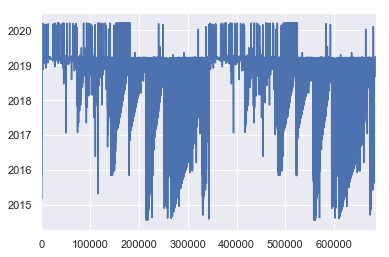

In [76]:
clean_usage.last_activity.dropna().plot();

In [ ]:
clean_usage = clean_usage.sort_values(by=['pai_account_id', 'date']).reset_index(drop=True)
x = clean_usage.last_activity.apply(lambda x: x.replace(tzinfo=None))

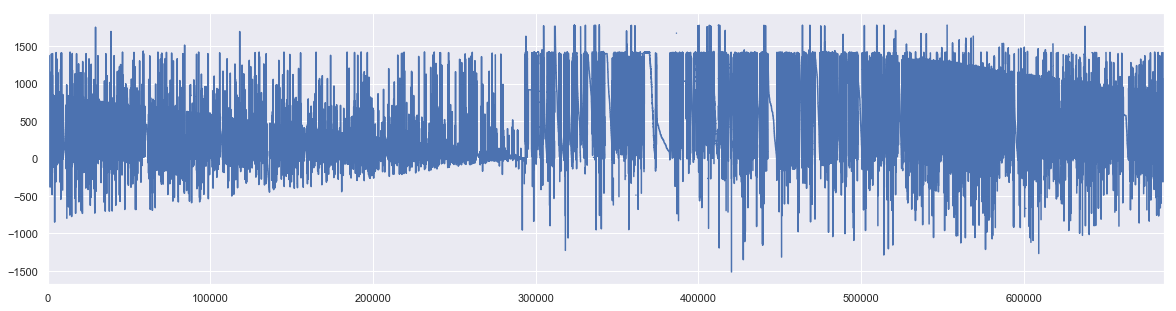

In [97]:
((clean_usage.date - x).dt.days * -1).plot(figsize=(20,5));

In [99]:
clean_usage.pai_account_id.value_counts().head(1)

0012000001CGaFL    8216
Name: pai_account_id, dtype: int64

In [100]:
tmp = clean_usage[clean_usage.pai_account_id == '0012000001CGaFL']

In [117]:
tmp.date.drop_duplicates(keep='first').head()

374294   2015-05-05
374343   2015-07-29
374344   2015-08-23
374345   2015-09-17
374351   2015-11-17
Name: date, dtype: datetime64[ns]

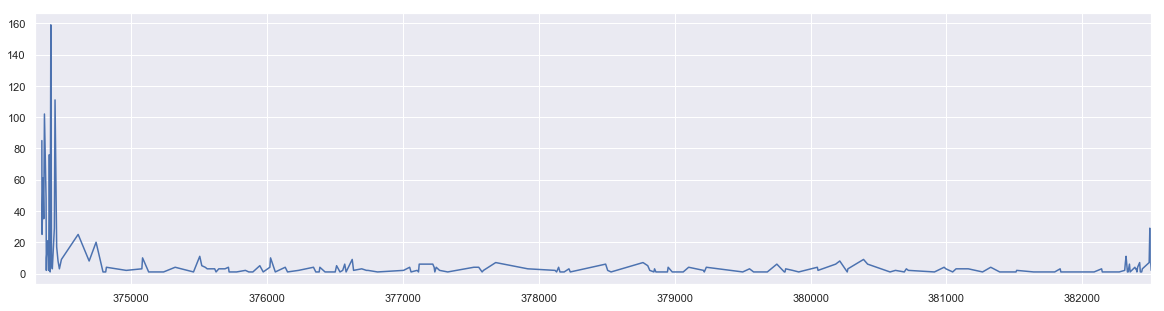

In [122]:
x = tmp.date.drop_duplicates(keep='first')
(x - x.shift()).dt.days.plot(figsize=(20,5));

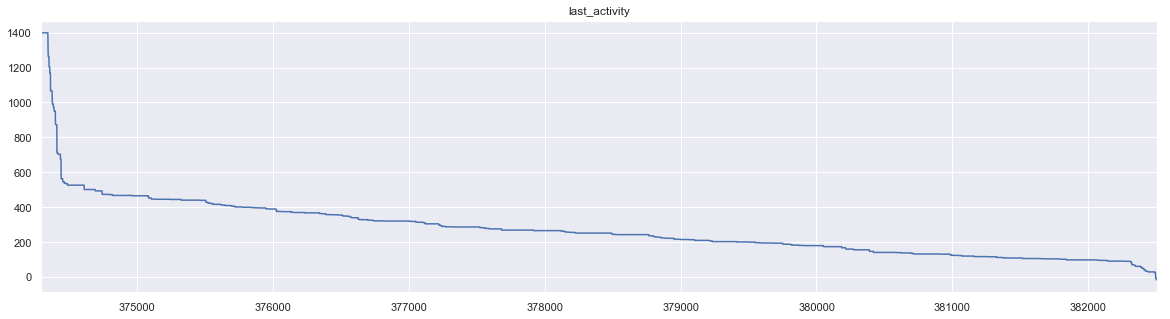

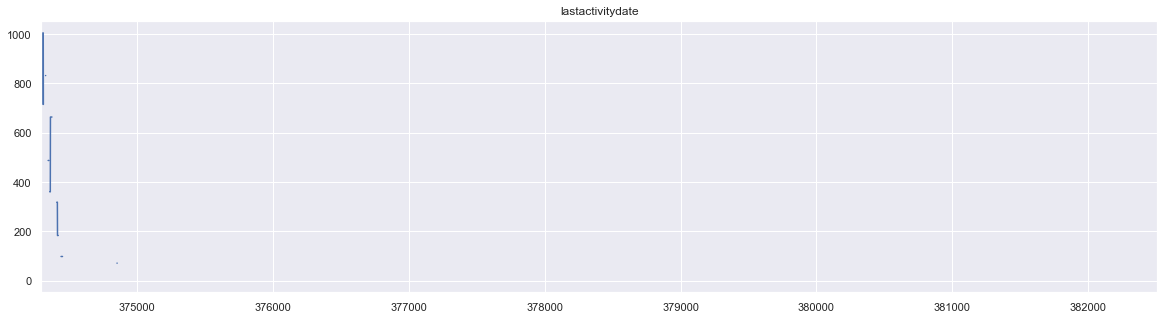

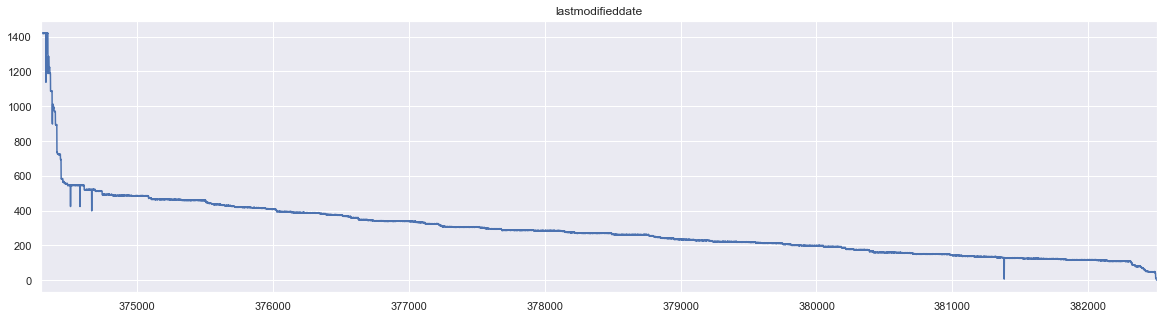

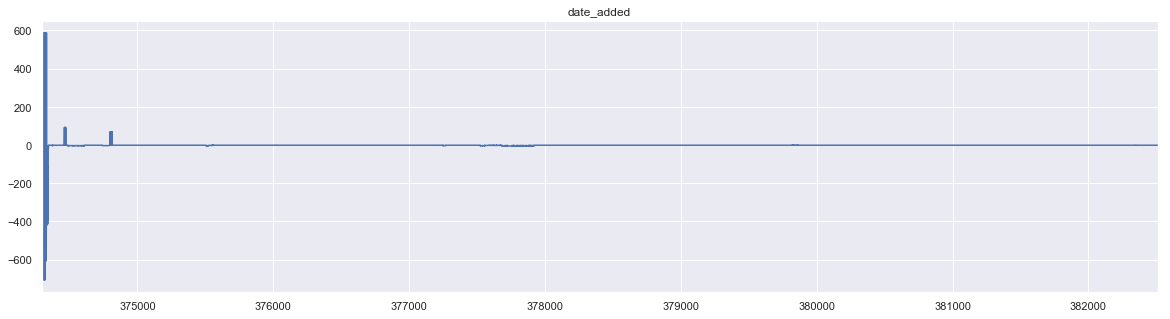

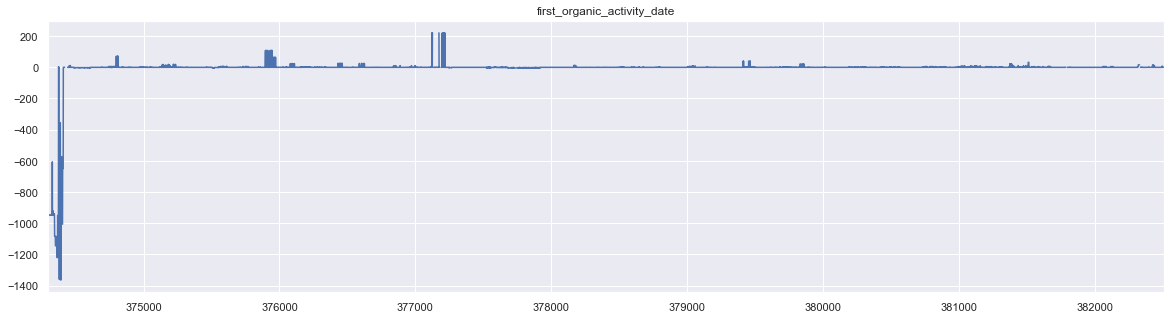

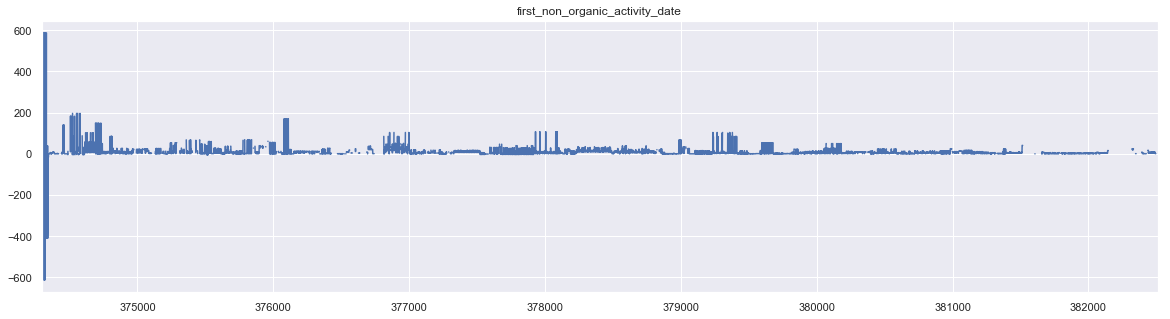

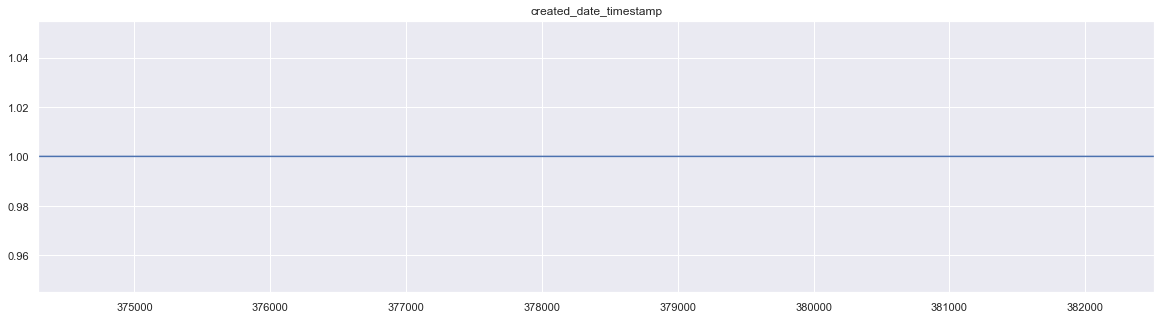

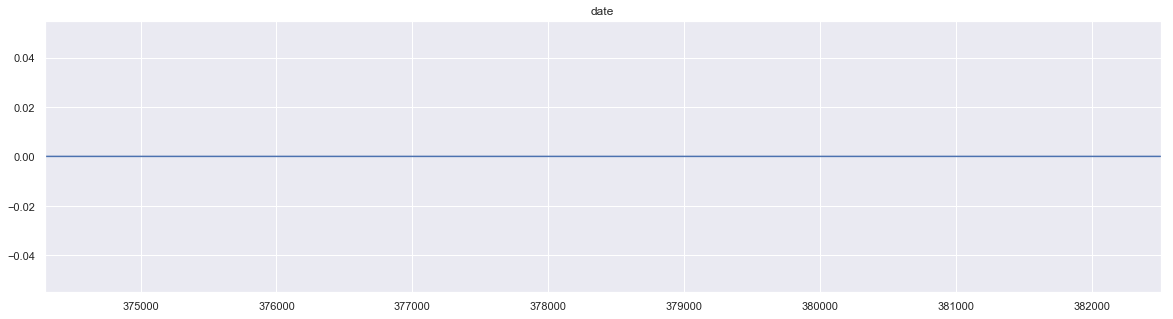

In [107]:
for col in date_cols:
    x = tmp[col].apply(lambda x: x.replace(tzinfo=None))
    ((tmp.date - x).dt.days * -1).plot(figsize=(20,5), title=col);
    plt.show();

In [103]:
tmp.head()

,recipe_execution_date,client_id,facebook_60_days_rollup,non_organic_60_days_rollup,virtual_blocked_inst_p360_last_90_days,tune_installs,last_activity,facebook_90_days_rollup,lastmodifiedbyid,x18_digit_id,lastactivitydate,platform,all_non_organic_90_days_rollup,account_name,id,adjust_installs,organic_30_days_rollup,x30_day_non_organic_installs,createdbyid,lastmodifieddate,all_non_organic_30_days_rollup,nois_via_agency_last_30_days,name,account_hq_country,date_added,first_organic_activity_date,pai_account_id,facebook_last_day,non_organic_90_days_rollup,csm_emailfield,first_non_organic_notification_sent,organic_60_days_rollup,all_non_organic_60_days_rollup,app_status_in_hq,x5_to_30_trend_non_organic,first_organic_notification_sent,facebook_30_days_rollup,first_non_organic_activity_date,clicks_last_day_c,non_organic_30_days_rollup,apsalar_installs,clicks_30_days_rollup,localization_timezone,activity_counter,created_date_timestamp,date,category_topia,isdeleted,organic_90_days_rollup
374294,2019-03-26,6,0,4420,0.0,2598.0,2019-03-04 00:00:00+00:00,122,0050O0000084wVWQAY,a032000000IreJ6AAJ,2018-02-02 00:00:00+00:00,android,10135,Cheetah Utilities,a032000000IreJ6AAJ,19989.0,3437014,1982,00520000003RlvMAAS,2019-03-21 11:22:12+00:00,1982,1713,Security Master - Antivirus- VPN- AppLock- Boo...,China,2014-03-17 00:00:00+00:00,2012-09-28 00:00:00+00:00,0012000001CGaFL,0.0,10013,lina@appsflyer.com,False,7186458,4420,Active,73.86,False,0,2014-03-25 00:00:00+00:00,0.0,1982,2596.0,502641,Asia/Shanghai,454,2015-05-05 12:33:38+00:00,2015-05-05,Tools,False,11339233
374295,2019-03-26,6,26,294856,0.0,12020.0,2019-03-04 00:00:00+00:00,3827,0050O000007JHoLQAW,a032000000IrdJJAAZ,2017-04-18 00:00:00+00:00,android,328236,Cheetah Utilities,a032000000IrdJJAAZ,70436.0,12102379,219470,00520000003RlvMAAS,2019-03-24 02:13:08+00:00,219463,169035,Clean Master- Space Cleaner & Antivirus,China,2013-05-29 00:00:00+00:00,2012-09-28 00:00:00+00:00,0012000001CGaFL,0.0,324409,linda.li@appsflyer.com,False,24728096,294882,Active,353.69,False,7,2013-08-28 00:00:00+00:00,0.0,219456,26884.0,236885,Asia/Shanghai,454,2015-05-05 12:32:45+00:00,2015-05-05,Tools,False,38942955
374296,2019-03-26,6,0,430,0.0,NaN,2019-03-04 00:00:00+00:00,1,0050O0000084wVWQAY,a032000000IrgQYAAZ,NaT,ios,737,Cheetah Utilities,a032000000IrgQYAAZ,NaN,974823,179,00520000003RlvMAAS,2019-03-24 11:27:03+00:00,179,0,PhotoGrid - Video & Pic Editor,China,2014-03-18 00:00:00+00:00,2012-09-28 00:00:00+00:00,0012000001CGaFL,0.0,736,lina@appsflyer.com,False,2024356,430,Active,50.28,False,0,2014-03-19 00:00:00+00:00,0.0,179,NaN,708,UTC,454,2015-05-05 12:35:37+00:00,2015-05-05,Lifestyle; Photo & Video,False,3385317
374297,2019-03-26,6,26,327909,0.0,12020.0,2019-03-04 00:00:00+00:00,2132,0050O000007JHoLQAW,a032000000IrdJJAAZ,2017-04-18 00:00:00+00:00,android,360063,Cheetah Utilities,a032000000IrdJJAAZ,70436.0,12107145,252731,00520000003RlvMAAS,2019-03-25 15:29:17+00:00,252724,204353,Clean Master- Space Cleaner & Antivirus,China,2013-05-29 00:00:00+00:00,2012-09-28 00:00:00+00:00,0012000001CGaFL,0.0,357931,linda.li@appsflyer.com,False,24701088,327935,Active,338.38,False,7,2013-08-28 00:00:00+00:00,0.0,252717,26884.0,233143,Asia/Shanghai,454,2015-05-05 12:32:45+00:00,2015-05-05,Tools,False,38899987
374298,2019-03-26,6,26,294856,0.0,12020.0,2019-03-04 00:00:00+00:00,3827,0050O0000084wVWQAY,a032000000IrdJJAAZ,2017-04-18 00:00:00+00:00,android,328236,Cheetah Utilities,a032000000IrdJJAAZ,70436.0,12102379,219470,00520000003RlvMAAS,2019-03-24 11:26:06+00:00,219463,169035,Clean Master- Space Cleaner & Antivirus,China,2013-05-29 00:00:00+00:00,2012-09-28 00:00:00+00:00,0012000001CGaFL,0.0,324409,linda.li@appsflyer.com,False,24728096,294882,Active,353.69,False,7,2013-08-28 00:00:00+00:00,0.0,219456,26884.0,236885,Asia/Shanghai,454,2015-05-05 12:32:45+00:00,2015-05-05,Tools,False,38942955


In [62]:
clean_target['pair'] = clean_target.pai_account_id + clean_target.date
clean_usage['pair'] = clean_usage.pai_account_id + clean_usage.date

usage_pairs = set(clean_usage.pair)
target_pairs = set(clean_target.pair)

len(usage_pairs), len(target_pairs)

(91560, 2572659)

In [56]:
clean_target.head()

,client_id,pai_account_id,recipe_execution_date,pai_is_deleted,account_birth_date,poc_end_date,profile,date,churn_date,churn_in_stage_paying,churn_in_stage_poc,reached_poc_stage,stage,churn_in_stage
0,6,0010O00001jRcV6,2019-03-26,0,2016-11-06,NaN,NaN,2019-02-09,NaN,0,0,0,,NaN
1,6,0010O00001jRcn5,2019-03-26,0,2016-11-06,NaN,NaN,2019-02-09,NaN,0,0,0,,NaN
2,6,0010O00001jRcxQ,2019-03-26,0,NaN,NaN,longtail,2019-02-09,NaN,0,0,0,,NaN
3,6,0010O00001jRd7a,2019-03-26,0,2016-11-06,NaN,NaN,2019-02-09,NaN,0,0,0,,NaN
4,6,0010O00001jRdDp,2019-03-26,0,NaN,NaN,longtail,2019-02-09,NaN,0,0,0,,NaN
